In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.tsa.stattools import adfuller ## Augmented Dickey-Fuller test for non-stationarity in time series
from statsmodels.tsa.seasonal import seasonal_decompose

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
START_YEAR = "1980"
END_YEAR = "2022"

In [3]:
METRIC_NAMES = ["Woollings et al. 2010", "Barnes & Polvani 2013", "Barnes & Simpson 2017",\
                        "Grise & Polvani 2017", "Bracegirdle et al. 2018", "Ceppi et al. 2018", "Kerr et al. 2020"]
METRIC_DATA_NAMES = ['Woollings2010_NorthPacific', 'BarnesPolvani2013_NorthPacific', 'BarnesSimpson2017_NorthPacific',\
                     'GrisePolvani2017_NorthPacific', 'Bracegirdle2018_NorthPacific', 'Ceppi2018_NorthPacific',\
                     'Kerr2020_NorthPacific']

In [4]:
METRIC_LABEL_RENAMER = dict(zip(METRIC_DATA_NAMES, METRIC_NAMES))

## Load Reanalysis

In [5]:
era_npac_day_dict = {}

era_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
era_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_ERA5_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [6]:
jra55_npac_day_dict = {}

jra55_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
jra55_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_JRA55_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [7]:
merra2_npac_day_dict = {}

merra2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
merra2_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_MERRA2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [8]:
ncepdoe2_npac_day_dict = {}

ncepdoe2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
ncepdoe2_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_NCEPDOE2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [9]:
t20cr_npac_day_dict = {}

t20cr_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
t20cr_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
t20cr_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('/home/thomaskeel/Documents/PhD/JASMIN experiments/NPAC_only_20CR_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]

# Make Figure 2

In [10]:
def get_linear_reg_slope(data, col_name):
    lin_reg_data = prepare_data_for_linear_reg(data, col_name)
    return linear_reg_slope(lin_reg_data)


def prepare_data_for_linear_reg(data, col_name):
    values = data[col_name].values.astype(float)
    ordinal_dates = get_ordinal_dates(data)
    lin_reg_data = pd.DataFrame([values, ordinal_dates]).T
    lin_reg_data = lin_reg_data.dropna()
    return lin_reg_data


def get_ordinal_dates(data, index_col_name='time'):
    return pd.to_datetime(data.reset_index()[index_col_name]).apply(lambda date: date.toordinal())


def linear_reg_slope(data):
    """
        data[0] should be values, data[1] should be ordinal dates
    """
    slope, intercept = np.polyfit(data[1], data[0], 1)
    lr1d = np.poly1d([slope, intercept])(data[1])
    return pd.DataFrame(lr1d, index=data[1].apply(lambda row: pd.to_datetime(datetime.date.fromordinal(int(row)))), columns=['reg_line'])

In [11]:
def get_year_gradient_of_trend(data, jet_lat_name='jet_lat', proportion_threshold_for_missing_data=4):
    """
        TODO: fix ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
    """
    try:
        cdata = data.dropna()
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except ValueError as ve:
        print(ve)
        pass
    try:
        assert float(data.isnull().sum(axis=0)) < (len(data)/proportion_threshold_for_missing_data)
        data = data.fillna(data.mean())
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except AssertionError as ae:
        print(f"{data.name}failed. {int(data.isnull().sum(axis=0))} out of {len(data)} data points missing")
        return np.nan

In [12]:
def get_seasonally_decomposed_year_gradient_of_trend(data, proportion_threshold_for_missing_data=4):
    """
        TODO: fix ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
    """
    try:
        cdata = data.dropna()
        res = seasonal_decompose(cdata, model='additive')
        lin_reg_line = get_linear_reg_slope(res.trend.reset_index(), 'trend')
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except ValueError as ve:
        print(ve)
        pass
    try:
        assert float(data.isnull().sum(axis=0)) < (len(data)/proportion_threshold_for_missing_data)
        data = data.fillna(data.mean())
        res = seasonal_decompose(data, model='additive')
        lin_reg_line = get_linear_reg_slope(res.trend.reset_index(), 'trend')
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except AssertionError as ae:
        print(f"{data.name}failed. {int(data.isnull().sum(axis=0))} out of {len(data)} data points missing")
        return np.nan

In [84]:
reanalysis_data = [era_npac_day_dict, jra55_npac_day_dict, merra2_npac_day_dict, ncepdoe2_npac_day_dict, t20cr_npac_day_dict]
reanalysis_names = ["ERA-5", "JRA-55", "MERRA-2", "NCEP/DOE II", "20CR"]
jet_lat_mean_dict = {}
jet_lat_std_dict = {}
jet_lat_std_err_dict = {}
jet_lat_trend_dict = {}
for ind, reanalysis_set in enumerate(reanalysis_data):
    reanalysis_name = reanalysis_names[ind]
    jet_lat_mean_dict[reanalysis_name] = {}
    jet_lat_std_dict[reanalysis_name] = {}
    jet_lat_std_err_dict[reanalysis_name] = {}
    jet_lat_trend_dict[reanalysis_name] = {}
    print(reanalysis_name)
    for metric in METRIC_DATA_NAMES:
        if metric == "Bracegirdle2018_NorthPacific":
            jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].mean())
            jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].std())
            jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].std()) / np.sqrt(len(reanalysis_set[metric]['annual_JPOS']))
            b18_data = reanalysis_set[metric]['annual_JPOS']
            b18_data.index = pd.date_range(start=START_YEAR, freq="y", periods=len(b18_data))
            b18_data.index = b18_data.index.rename('time')
            jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(pd.DataFrame(b18_data), jet_lat_name='annual_JPOS')
            continue
        # if metric == "Kerr2020_NorthPacific":
        #     jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean())
        #     jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean('lon').std())
        #     jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean('lon').std()) / np.sqrt(len(reanalysis_set[metric]['jet_lat']))
        #     jet_lat_trend_dict[reanalysis_name][metric] = get_seasonally_decomposed_year_gradient_of_trend(reanalysis_set[metric]['jet_lat'].mean('lon').to_dataframe())
        else:
            reanalysis_set[metric].index = pd.to_datetime(reanalysis_set[metric].index)
            jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean())
            jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].std())
            jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].std()) / np.sqrt(len(reanalysis_set[metric]['jet_lat']))
            jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric])        
        
        

ERA-5
JRA-55
MERRA-2
NCEP/DOE II
20CR


In [85]:
jet_lat_mean_df = pd.DataFrame(jet_lat_mean_dict)
jet_lat_std_df = pd.DataFrame(jet_lat_std_dict)
jet_lat_std_err_df = pd.DataFrame(jet_lat_std_err_dict)
jet_lat_trend_df = pd.DataFrame(jet_lat_trend_dict)

jet_lat_mean_df = jet_lat_mean_df.stack().reset_index()
jet_lat_std_df = jet_lat_std_df.stack().reset_index()
jet_lat_std_err_df = jet_lat_std_err_df.stack().reset_index()
jet_lat_trend_df = jet_lat_trend_df.stack().reset_index()

jet_lat_mean_df.columns = ["Metric", "Dataset", "Mean"]
jet_lat_std_df.columns = ["Metric", "Dataset", "Standard Deviation"]
jet_lat_std_err_df.columns = ["Metric", "Dataset", "Standard Error"]
jet_lat_trend_df.columns = ["Metric", "Dataset", "Trend"]

In [86]:
jet_lat_mean_std_df = jet_lat_mean_df.merge(jet_lat_std_df, on=["Metric", "Dataset"])
jet_lat_mean_std_err_df = jet_lat_mean_std_df.merge(jet_lat_std_err_df, on=["Metric", "Dataset"])
jet_lat_diagnostics_df = jet_lat_mean_std_err_df.merge(jet_lat_trend_df, on=["Metric", "Dataset"])

In [87]:
jet_lat_diagnostics_df['Metric'] = jet_lat_diagnostics_df.Metric.apply(lambda row: METRIC_LABEL_RENAMER[row])

In [88]:
jet_lat_diagnostics_df

,Metric,Dataset,Mean,Standard Deviation,Standard Error,Trend
0,Woollings et al. 2010,ERA-5,43.020207,8.677489,0.070060,0.040365
1,Woollings et al. 2010,JRA-55,43.278396,8.962785,0.076076,0.034222
2,Woollings et al. 2010,MERRA-2,42.881350,8.996748,0.073000,0.025712
3,Woollings et al. 2010,NCEP/DOE II,42.957126,8.602682,0.079573,-0.012401
4,Woollings et al. 2010,20CR,43.090565,8.648127,0.079993,0.008800
5,Barnes & Polvani 2013,ERA-5,43.029626,8.655016,0.069878,0.039607
6,Barnes & Polvani 2013,JRA-55,43.263349,8.981914,0.076238,0.033636
7,Barnes & Polvani 2013,MERRA-2,42.896907,9.018047,0.073173,0.029205
8,Barnes & Polvani 2013,NCEP/DOE II,42.906969,8.546549,0.079053,-0.007706
9,Barnes & Polvani 2013,20CR,43.066649,8.646214,0.079975,0.010900


Text(0.5, 1.0, 'North Pacific Jet Latitude')

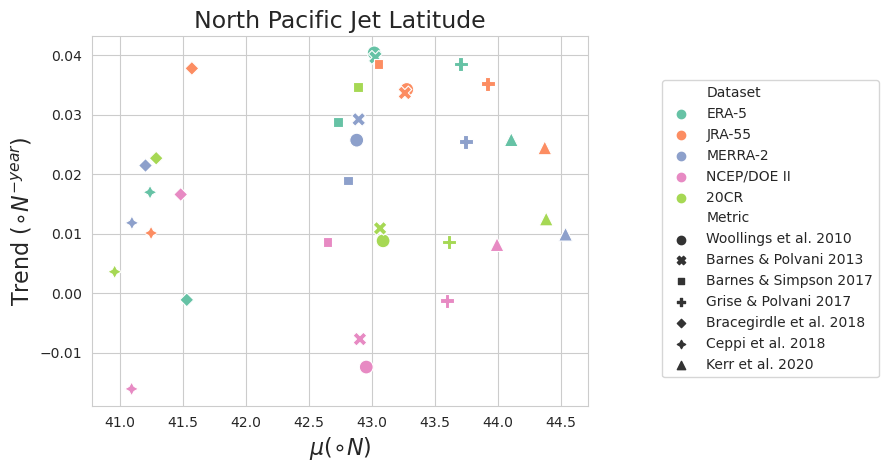

In [89]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1)
sns.scatterplot(x="Mean", y="Trend", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric", 
                ax=ax, s=100, alpha=1, palette='Set2')
ax.legend(ncols=1, bbox_to_anchor=[1.6, 0.9], fontsize=10)
ax.set_xlabel("${\mu (\circ N)}$", size=16); ax.set_ylabel("Trend (${\circ N}^{-year}$)", size=16)
ax.set_title("North Pacific Jet Latitude", size=17)
# plt.savefig("figures/scatters/npac_jet_meanvsgradient_metric_dataset_scatter.png", bbox_inches='tight')

Text(0.5, 1.0, 'North Pacific Jet Latitude')

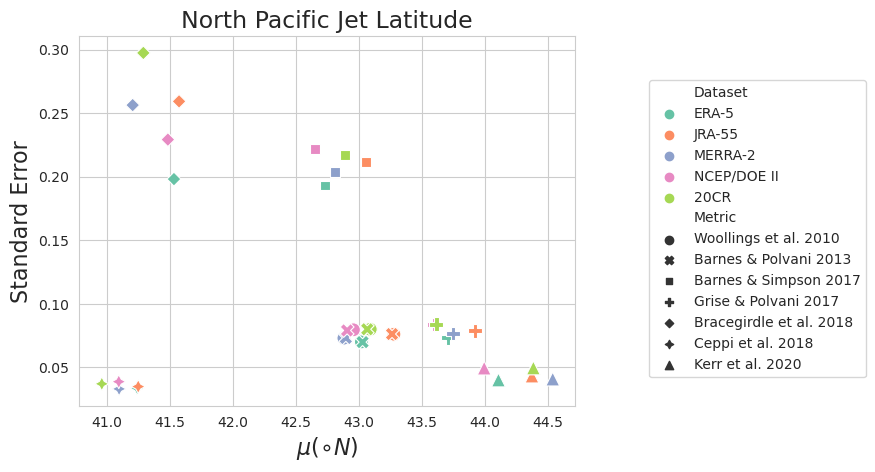

In [90]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1)
sns.scatterplot(x="Mean", y="Standard Error", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric", 
                ax=ax, s=100, alpha=1, palette='Set2')
ax.legend(ncols=1, bbox_to_anchor=[1.6, 0.9], fontsize=10)
ax.set_xlabel("${\mu (\circ N)}$", size=16); ax.set_ylabel("Standard Error", size=16)
ax.set_title("North Pacific Jet Latitude", size=17)
# plt.savefig("figures/scatters/npac_jet_meanvsstderr_metric_dataset_scatter.png", bbox_inches='tight')

In [92]:
jet_lat_trend_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Trend')
jet_lat_std_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Standard Deviation')
jet_lat_mean_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Mean')

In [93]:
jet_lat_trend_pivot_df = jet_lat_trend_pivot_df.sort_index(key=lambda x: x.str[-4:])
jet_lat_std_pivot_df = jet_lat_std_pivot_df.sort_index(key=lambda x: x.str[-4:])
jet_lat_mean_pivot_df = jet_lat_mean_pivot_df.sort_index(key=lambda x: x.str[-4:])

In [94]:
jet_lat_trend_pivot_df

Dataset,20CR,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,,
Woollings et al. 2010,0.008800,0.040365,0.034222,0.025712,-0.012401
Barnes & Polvani 2013,0.010900,0.039607,0.033636,0.029205,-0.007706
Barnes & Simpson 2017,0.034709,0.028705,0.038441,0.018926,0.008591
Grise & Polvani 2017,0.008608,0.038501,0.035180,0.025447,-0.001259
Bracegirdle et al. 2018,0.022676,-0.001115,0.037764,0.021450,0.016589
Ceppi et al. 2018,0.003604,0.016960,0.010111,0.011816,-0.016076
Kerr et al. 2020,0.012477,0.025803,0.024429,0.009926,0.008174


In [95]:
jet_lat_std_pivot_df

Dataset,20CR,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,,
Woollings et al. 2010,8.648127,8.677489,8.962785,8.996748,8.602682
Barnes & Polvani 2013,8.646214,8.655016,8.981914,9.018047,8.546549
Barnes & Simpson 2017,7.430774,7.563075,7.871036,7.951677,7.587887
Grise & Polvani 2017,9.062965,9.095139,9.287003,9.442443,9.053986
Bracegirdle et al. 2018,1.682317,1.585093,1.639701,1.680967,1.296659
Ceppi et al. 2018,4.005937,4.167004,4.112008,4.073955,4.189479
Kerr et al. 2020,5.360927,4.967202,5.088928,5.032465,5.347074


In [96]:
jet_lat_mean_pivot_df

Dataset,20CR,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,,
Woollings et al. 2010,43.090565,43.020207,43.278396,42.881350,42.957126
Barnes & Polvani 2013,43.066649,43.029626,43.263349,42.896907,42.906969
Barnes & Simpson 2017,42.889649,42.732248,43.054755,42.810447,42.649701
Grise & Polvani 2017,43.613960,43.706205,43.921258,43.745655,43.596419
Bracegirdle et al. 2018,41.290625,41.533203,41.573750,41.205814,41.485156
Ceppi et al. 2018,40.961106,41.241894,41.250016,41.098140,41.095602
Kerr et al. 2020,44.384624,44.107600,44.373203,44.538068,43.994416
